In [1]:
pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=f1504f827ae2f48c9770f0bf2e968d02b26285a63c53747d4af3194229fa5d16
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [3]:
# Antecedent (input) variables
doneness = ctrl.Antecedent(np.arange(0, 12, 1), 'doneness')
time = ctrl.Antecedent(np.arange(0, 60, 1), 'time')

# Consequent (output) variable
temperature = ctrl.Consequent(np.arange(0, 221, 1), 'temperature')

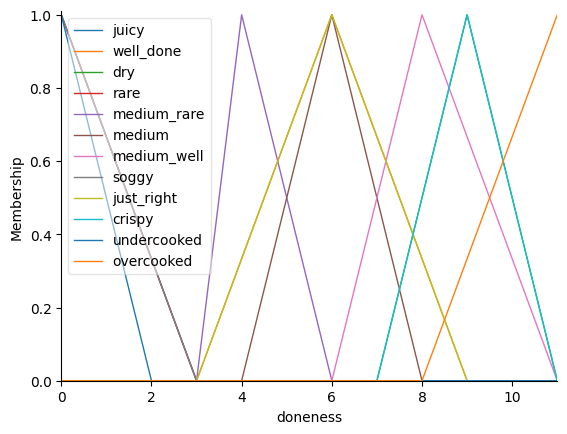

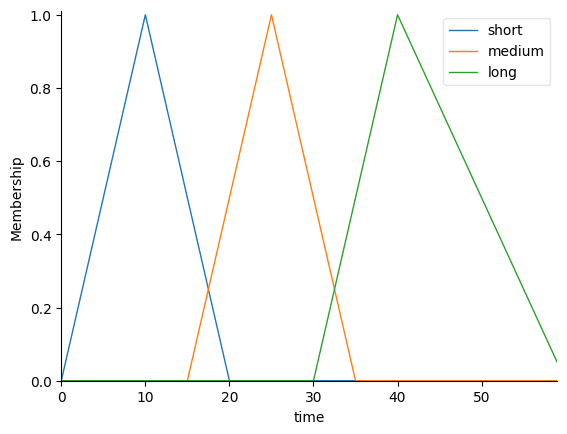

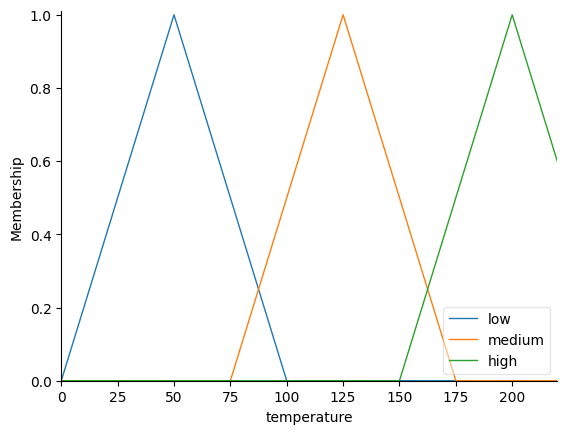

In [4]:
# membership functions for doneness levels
doneness['juicy'] = fuzz.trimf(doneness.universe, [0, 0, 3])
doneness['well_done'] = fuzz.trimf(doneness.universe, [3, 6, 9])
doneness['dry'] = fuzz.trimf(doneness.universe, [7, 9, 11])
doneness['rare'] = fuzz.trimf(doneness.universe, [0, 0, 3])
doneness['medium_rare'] = fuzz.trimf(doneness.universe, [3, 4, 6])
doneness['medium'] = fuzz.trimf(doneness.universe, [4, 6, 8])
doneness['medium_well'] = fuzz.trimf(doneness.universe, [6, 8, 11])
doneness['soggy'] = fuzz.trimf(doneness.universe, [0, 0, 3])
doneness['just_right'] = fuzz.trimf(doneness.universe, [3, 6, 9])
doneness['crispy'] = fuzz.trimf(doneness.universe, [7, 9, 11])
doneness['undercooked'] = fuzz.trimf(doneness.universe, [0, 0, 2])
doneness['overcooked'] = fuzz.trimf(doneness.universe, [8, 11, 11])

# membership functions for time
time['short'] = fuzz.trimf(time.universe, [0, 10, 20])
time['medium'] = fuzz.trimf(time.universe, [15, 25, 35])
time['long'] = fuzz.trimf(time.universe, [30, 40, 60])

# membership functions for temperature
temperature['low'] = fuzz.trimf(temperature.universe, [0, 50, 100])
temperature['medium'] = fuzz.trimf(temperature.universe, [75, 125, 175])
temperature['high'] = fuzz.trimf(temperature.universe, [150, 200, 250])

doneness.view()
time.view()
temperature.view()

In [6]:
# fuzzy rules
rule1 = ctrl.Rule(doneness['undercooked'] & time['short'], temperature['low'])
rule2 = ctrl.Rule(doneness['undercooked'] & time['medium'], temperature['low'])
rule3 = ctrl.Rule(doneness['undercooked'] & time['long'], temperature['low'])

rule4 = ctrl.Rule(doneness['soggy'] & time['short'], temperature['low'])
rule5 = ctrl.Rule(doneness['soggy'] & time['medium'], temperature['low'])
rule6 = ctrl.Rule(doneness['soggy'] & time['long'], temperature['medium'])

rule7 = ctrl.Rule(doneness['rare'] & time['short'], temperature['medium'])
rule8 = ctrl.Rule(doneness['rare'] & time['medium'], temperature['medium'])
rule9 = ctrl.Rule(doneness['rare'] & time['long'], temperature['high'])

rule10 = ctrl.Rule(doneness['medium_rare'] & time['short'], temperature['medium'])
rule11 = ctrl.Rule(doneness['medium_rare'] & time['medium'], temperature['high'])
rule12 = ctrl.Rule(doneness['medium_rare'] & time['long'], temperature['high'])

rule13 = ctrl.Rule(doneness['juicy'] & time['short'], temperature['high'])
rule14 = ctrl.Rule(doneness['juicy'] & time['medium'], temperature['medium'])
rule15 = ctrl.Rule(doneness['juicy'] & time['long'], temperature['low'])

rule16 = ctrl.Rule(doneness['medium'] & time['short'], temperature['medium'])
rule17 = ctrl.Rule(doneness['medium'] & time['medium'], temperature['medium'])
rule18 = ctrl.Rule(doneness['medium'] & time['long'], temperature['medium'])

rule19 = ctrl.Rule(doneness['medium_well'] & time['short'], temperature['medium'])
rule20 = ctrl.Rule(doneness['medium_well'] & time['medium'], temperature['medium'])
rule21 = ctrl.Rule(doneness['medium_well'] & time['long'], temperature['medium'])

rule22 = ctrl.Rule(doneness['just_right'] & time['short'], temperature['medium'])
rule23 = ctrl.Rule(doneness['just_right'] & time['medium'], temperature['medium'])
rule24 = ctrl.Rule(doneness['just_right'] & time['long'], temperature['medium'])

rule25 = ctrl.Rule(doneness['well_done'] & time['short'], temperature['high'])
rule26 = ctrl.Rule(doneness['well_done'] & time['medium'], temperature['medium'])
rule27 = ctrl.Rule(doneness['well_done'] & time['long'], temperature['high'])

rule28 = ctrl.Rule(doneness['crispy'] & time['short'], temperature['high'])
rule29 = ctrl.Rule(doneness['crispy'] & time['medium'], temperature['high'])
rule30 = ctrl.Rule(doneness['crispy'] & time['long'], temperature['high'])

rule31 = ctrl.Rule(doneness['overcooked'] & time['short'], temperature['high'])
rule32 = ctrl.Rule(doneness['overcooked'] & time['medium'], temperature['high'])
rule33 = ctrl.Rule(doneness['overcooked'] & time['long'], temperature['high'])

In [7]:
# Manually map the linguistic terms to scalar values
doneness_levels = {
    'undercooked': 1.0,
    'juicy': 3.0,
    'well_done': 6.0,
    'dry': 9.0,
    'rare': 1.5,
    'medium_rare': 3.5,
    'medium': 6.0,
    'medium_well': 9.0,
    'soggy': 1.0,
    'just_right': 6.0,
    'crispy': 9.0,
    'overcooked': 9.5
}

# doneness.automf(names=list(doneness_levels.keys()))

In [8]:
# rule base
temperature_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
                                      rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19,
                                      rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27, rule28,
                                      rule29, rule30, rule31, rule32, rule33])

# simulation
temperature_sim = ctrl.ControlSystemSimulation(temperature_ctrl)

In [9]:
# get user input for doneness level
doneness = input(f"Enter doneness level ({', '.join(doneness_levels)}): ").strip().lower()

# verify that the doneness level is valid
if doneness not in doneness_levels:
    print("Invalid doneness level for the chosen cook option.")
    exit()

Enter doneness level (undercooked, juicy, well_done, dry, rare, medium_rare, medium, medium_well, soggy, just_right, crispy, overcooked): crispy


In [ ]:
# get user input for cooking time
while True:
    try:
        cooking_time = int(input("Please enter the time you want to air fry for (in minutes): "))
        if cooking_time >= 0:
            # Set input values based on user choices
            temperature_sim.input['doneness'] = doneness_levels[doneness]
            temperature_sim.input['time'] = cooking_time

            # Perform fuzzy inference
            temperature_sim.compute()

            # Get the defuzzified output
            recommended_temperature = temperature_sim.output['temperature']

            # Print the recommended temperature
            print(f"Recommended Temperature for your food to be air fried to '{doneness}' in {cooking_time} minutes: {recommended_temperature:.2f}°C")

            # Print the recommended temperature graph
            temperature.view(sim=temperature_sim)

            # Mark the centroid on the graph
            plt.axvline(x=temperature_sim.output['temperature'], color='b', linestyle='--', label='Centroid')
            plt.legend()
            plt.show()
            break
        else:
            print("Please enter the time you want your food to be air fried in (in minutes).")
    except ValueError:
        print("You shouldn't cook like that!")
        exit()
